<a href="https://colab.research.google.com/github/rizzaesh/Thesis---a-two-layer-power-network/blob/main/Simulator_trying_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandapower.topology as top
from pandapower import plotting
from pandapower.plotting import simple_plot, pf_res_plotly,simple_plotly

In [2]:
Network = pn.case14
Net = Network()

In [3]:
Gr = top.create_nxgraph(Net)

In [21]:
seed = 10
pos = nx.spring_layout(Gr,seed=seed)

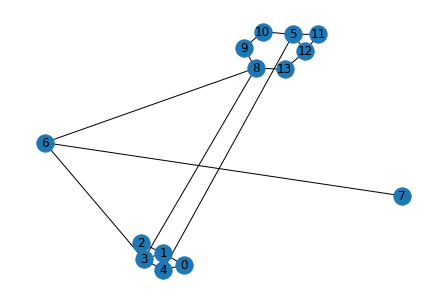

In [22]:
nx.draw(Gr, pos = pos, with_labels=True)
plt.show()

In [ ]:
scale = nx.scale_free_graph()